# Code embedding evaluation (41 repositories / test set)

## 1. Loading repository information

In [20]:
!pip install gdown
!gdown 1EE5y_u2_RTWk0k1Z2RwELj1eHoc7WeH_

Downloading...
From: https://drive.google.com/uc?id=1EE5y_u2_RTWk0k1Z2RwELj1eHoc7WeH_
To: /content/repo_info_test.pkl
100% 19.8M/19.8M [00:00<00:00, 155MB/s]


In [21]:
import pickle

with open("repo_info_test.pkl", "rb") as f:
    repo_info = pickle.load(f)
    f.close()

## 2. Download pre-trained model

In [22]:
!pip3 install torch
!pip3 install transformers
!wget https://raw.githubusercontent.com/microsoft/CodeBERT/master/UniXcoder/unixcoder.py
# !curl -O https://raw.githubusercontent.com/microsoft/CodeBERT/master/UniXcoder/unixcoder.py

--2023-07-09 17:29:50--  https://raw.githubusercontent.com/microsoft/CodeBERT/master/UniXcoder/unixcoder.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10352 (10K) [text/plain]
Saving to: ‘unixcoder.py’

unixcoder.py        100%[===================>]  10.11K  --.-KB/s    in 0s      

2023-07-09 17:29:50 (116 MB/s) - ‘unixcoder.py’ saved [10352/10352]



In [23]:
import torch

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(device)

cuda


In [24]:
unixcoder_model_names = [
    "Lazyhope/unixcoder-nine-advtest"
]

In [25]:
from unixcoder import UniXcoder
from transformers import AutoTokenizer, AutoModel

unixcoder_models = {}
# Initialise unixcoder model
for u_name in unixcoder_model_names:
    unixcoder_models[u_name] = UniXcoder(u_name)

## 3. Generating code embeddings

In [26]:
# Getting code embeddings by UniXcoder
def get_unixcoder_embeddings(code, model):
    tokens_ids = model.tokenize([code], max_length=512, mode="<encoder-only>")
    source_ids = torch.tensor(tokens_ids).to(device)
    _, embeddings = model(source_ids)
    embeddings = embeddings.to("cpu")
    del source_ids
    return embeddings

# Getting code list embeddings
def get_code_list_embeddings(data_list):
    codes_embeddings = {}
    # Using UniXcoder model
    for u_name, u_model in tqdm(unixcoder_models.items()):
        print(f" - Using {u_name} model - Running on", device)
        model = u_model.to(device)
        code_embeddings_list = torch.concat([get_unixcoder_embeddings(code, model) for code in data_list])
        codes_embeddings[u_name] = code_embeddings_list
        del model

    return codes_embeddings


# Getting embeddings
def get_embeddings(input_data=None, input_mode=None):
    if input_data is None or not input_data:
        return torch.zeros((768,), device=device)

    with torch.no_grad():
        if input_mode == "codes":
            return get_code_list_embeddings(input_data)


In [27]:
from tqdm import tqdm

for repo_name, repo_dict in tqdm(repo_info.items()):
    print(f" - Generating code embeddings for {repo_name} - ")
    repo_dict["codes_embeddings"] = get_embeddings(input_data=repo_dict["codes"], input_mode="codes")

  0%|          | 0/41 [00:00<?, ?it/s]

 - Generating code embeddings for ellisonleao/pyshorteners - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



  2%|▏         | 1/41 [00:01<00:50,  1.27s/it]

 - Generating code embeddings for sloria/doitlive - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



  5%|▍         | 2/41 [00:03<01:14,  1.90s/it]

 - Generating code embeddings for sebastien/cuisine - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



  7%|▋         | 3/41 [00:12<03:07,  4.95s/it]

 - Generating code embeddings for lepture/authlib - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 10%|▉         | 4/41 [00:33<07:05, 11.51s/it]

 - Generating code embeddings for inducer/pudb - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 12%|█▏        | 5/41 [00:35<04:48,  8.02s/it]

 - Generating code embeddings for uber/pyflame - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 15%|█▍        | 6/41 [00:35<03:09,  5.42s/it]

 - Generating code embeddings for aws/aws-cli - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 17%|█▋        | 7/41 [01:38<13:38, 24.06s/it]

 - Generating code embeddings for DamnWidget/anaconda - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 20%|█▉        | 8/41 [07:28<1:10:17, 127.80s/it]

 - Generating code embeddings for pykong/copier - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 22%|██▏       | 9/41 [07:31<47:24, 88.90s/it]   

 - Generating code embeddings for FactoryBoy/factory_boy - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 24%|██▍       | 10/41 [07:40<33:08, 64.14s/it]

 - Generating code embeddings for pynamodb/PynamoDB - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 27%|██▋       | 11/41 [07:48<23:30, 47.02s/it]

 - Generating code embeddings for jschneier/django-storages - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 29%|██▉       | 12/41 [07:52<16:23, 33.91s/it]

 - Generating code embeddings for robotframework/robotframework - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 32%|███▏      | 13/41 [09:22<23:42, 50.80s/it]

 - Generating code embeddings for mininet/mininet - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 34%|███▍      | 14/41 [09:26<16:33, 36.78s/it]

 - Generating code embeddings for ztane/python-Levenshtein - 



 37%|███▋      | 15/41 [09:26<11:09, 25.74s/it]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda
 - Generating code embeddings for audreyr/cookiecutter - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 39%|███▉      | 16/41 [09:31<08:06, 19.47s/it]

 - Generating code embeddings for google/python-fire - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 41%|████▏     | 17/41 [09:38<06:18, 15.77s/it]

 - Generating code embeddings for pycco-docs/pycco - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 44%|████▍     | 18/41 [09:39<04:17, 11.19s/it]

 - Generating code embeddings for rossgoodwin/hmap - 



 46%|████▋     | 19/41 [09:39<02:53,  7.87s/it]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda
 - Generating code embeddings for idan/oauthlib - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 49%|████▉     | 20/41 [09:51<03:10,  9.05s/it]

 - Generating code embeddings for paramiko/paramiko - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 51%|█████     | 21/41 [09:59<02:55,  8.80s/it]

 - Generating code embeddings for kevin1024/vcrpy - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 54%|█████▎    | 22/41 [10:05<02:30,  7.92s/it]

 - Generating code embeddings for platformio/platformio-core - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 56%|█████▌    | 23/41 [10:17<02:42,  9.05s/it]

 - Generating code embeddings for graphql-python/graphene - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 59%|█████▊    | 24/41 [10:25<02:32,  8.98s/it]

 - Generating code embeddings for klen/mixer - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 61%|██████    | 25/41 [10:29<01:56,  7.29s/it]

 - Generating code embeddings for seatgeek/sixpack - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 63%|██████▎   | 26/41 [10:31<01:29,  5.94s/it]

 - Generating code embeddings for bpython/bpython - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 66%|██████▌   | 27/41 [10:41<01:38,  7.06s/it]

 - Generating code embeddings for dfunckt/django-rules - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 68%|██████▊   | 28/41 [10:43<01:10,  5.39s/it]

 - Generating code embeddings for coleifer/peewee - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 71%|███████   | 29/41 [11:06<02:08, 10.67s/it]

 - Generating code embeddings for pythonnet/pythonnet - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 73%|███████▎  | 30/41 [11:13<01:46,  9.69s/it]

 - Generating code embeddings for python/typeshed - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 76%|███████▌  | 31/41 [20:34<29:11, 175.14s/it]

 - Generating code embeddings for KoffeinFlummi/Chronyk - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 78%|███████▊  | 32/41 [20:36<18:27, 123.05s/it]

 - Generating code embeddings for isnowfy/snownlp - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 80%|████████  | 33/41 [20:37<11:32, 86.50s/it] 

 - Generating code embeddings for alecthomas/voluptuous - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 83%|████████▎ | 34/41 [20:39<07:08, 61.15s/it]

 - Generating code embeddings for spulec/freezegun - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 85%|████████▌ | 35/41 [20:41<04:20, 43.48s/it]

 - Generating code embeddings for maxmind/geoip-api-python - 



 88%|████████▊ | 36/41 [20:41<02:32, 30.48s/it]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda
 - Generating code embeddings for pallets/werkzeug - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 90%|█████████ | 37/41 [21:03<01:50, 27.72s/it]

 - Generating code embeddings for nvbn/thefuck - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 93%|█████████▎| 38/41 [21:19<01:12, 24.20s/it]

 - Generating code embeddings for benfred/implicit - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 95%|█████████▌| 39/41 [21:21<00:35, 17.70s/it]

 - Generating code embeddings for erikrose/more-itertools - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



 98%|█████████▊| 40/41 [21:31<00:15, 15.31s/it]

 - Generating code embeddings for PyMySQL/mysqlclient-python - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - Running on cuda



100%|██████████| 41/41 [21:32<00:00, 31.53s/it]


## 4. Saving code embeddings

In [28]:
# Change the tensor format to CPU
save_device = "cpu"

for repo_name, repo_dict in repo_info.items():
    if type(repo_dict["codes_embeddings"]) is torch.Tensor:
        repo_info[repo_name]["codes_embeddings"] = repo_info[repo_name]["codes_embeddings"].to(save_device)
    else:
        for model_name, model_tensor in repo_dict["codes_embeddings"].items():
            repo_info[repo_name]["codes_embeddings"][model_name] = model_tensor.to(save_device)

In [29]:
# Check the tensor format
for repo_name, repo_dict in repo_info.items():
    if type(repo_dict["codes_embeddings"]) is torch.Tensor:
        print(repo_dict["codes_embeddings"].get_device())
    else:
        for model_name, model_tensor in repo_dict["codes_embeddings"].items():
            print(repo_info[repo_name]["codes_embeddings"][model_name].get_device())

-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1


In [30]:
with open("repo_info_test_code_embeddings.pkl", "wb") as f:
    pickle.dump(repo_info, f)
    f.close()

## 5. Calculating similarity

In [31]:
from torch.nn import CosineSimilarity
from itertools import combinations
import pandas as pd

cossim = CosineSimilarity(dim=0, eps=1e-8)
res = []
num_of_repos = len(repo_info)
num_of_rows = num_of_repos * (num_of_repos - 1) // 2

model_names = unixcoder_model_names

for repo1, repo2 in tqdm(combinations(repo_info.keys(), 2), total=num_of_rows):
    row = [repo1, repo2, repo_info[repo1]["topic"], repo_info[repo2]["topic"]]
    for model_name in model_names:

        if type(repo_info[repo1]["codes_embeddings"]) is torch.Tensor:
            embedding1 = repo_info[repo1]["codes_embeddings"]
        else:
            embedding1 = torch.mean(repo_info[repo1]["codes_embeddings"][model_name], dim=0)

        if type(repo_info[repo2]["codes_embeddings"]) is torch.Tensor:
            embedding2 = repo_info[repo2]["codes_embeddings"]
        else:
            embedding2 = torch.mean(repo_info[repo2]["codes_embeddings"][model_name], dim=0)

        similarity = cossim(embedding1, embedding2).cpu().detach().numpy().item()
        row.append(similarity)

    res.append(row)

df = pd.DataFrame(res, columns=["repo1", "repo2", "topic1", "topic2"] + model_names)
df

100%|██████████| 820/820 [00:00<00:00, 1971.39it/s]


,repo1,repo2,topic1,topic2,Lazyhope/unixcoder-nine-advtest
0,ellisonleao/pyshorteners,sloria/doitlive,URL Manipulation,Productivity CLI Tools,0.278231
1,ellisonleao/pyshorteners,sebastien/cuisine,URL Manipulation,SSH-style Deployment,0.102119
2,ellisonleao/pyshorteners,lepture/authlib,URL Manipulation,OAuth,0.355684
3,ellisonleao/pyshorteners,inducer/pudb,URL Manipulation,pdb-like Debugger,0.171610
4,ellisonleao/pyshorteners,uber/pyflame,URL Manipulation,Profiler,0.168625
...,...,...,...,...,...
815,nvbn/thefuck,erikrose/more-itertools,Productivity CLI Tools,Functional Programming,0.361806
816,nvbn/thefuck,PyMySQL/mysqlclient-python,Productivity CLI Tools,MySQL,0.318877
817,benfred/implicit,erikrose/more-itertools,Recommender Systems,Functional Programming,0.233704
818,benfred/implicit,PyMySQL/mysqlclient-python,Recommender Systems,MySQL,0.078420


In [32]:
df.dropna(inplace=True, subset=model_names)
df.reset_index(drop=True, inplace=True)
df

,repo1,repo2,topic1,topic2,Lazyhope/unixcoder-nine-advtest
0,ellisonleao/pyshorteners,sloria/doitlive,URL Manipulation,Productivity CLI Tools,0.278231
1,ellisonleao/pyshorteners,sebastien/cuisine,URL Manipulation,SSH-style Deployment,0.102119
2,ellisonleao/pyshorteners,lepture/authlib,URL Manipulation,OAuth,0.355684
3,ellisonleao/pyshorteners,inducer/pudb,URL Manipulation,pdb-like Debugger,0.171610
4,ellisonleao/pyshorteners,uber/pyflame,URL Manipulation,Profiler,0.168625
...,...,...,...,...,...
815,nvbn/thefuck,erikrose/more-itertools,Productivity CLI Tools,Functional Programming,0.361806
816,nvbn/thefuck,PyMySQL/mysqlclient-python,Productivity CLI Tools,MySQL,0.318877
817,benfred/implicit,erikrose/more-itertools,Recommender Systems,Functional Programming,0.233704
818,benfred/implicit,PyMySQL/mysqlclient-python,Recommender Systems,MySQL,0.078420


In [33]:
df.to_csv("code_embedding_evaluation_test_41.csv")

## 6. Evaluating different models

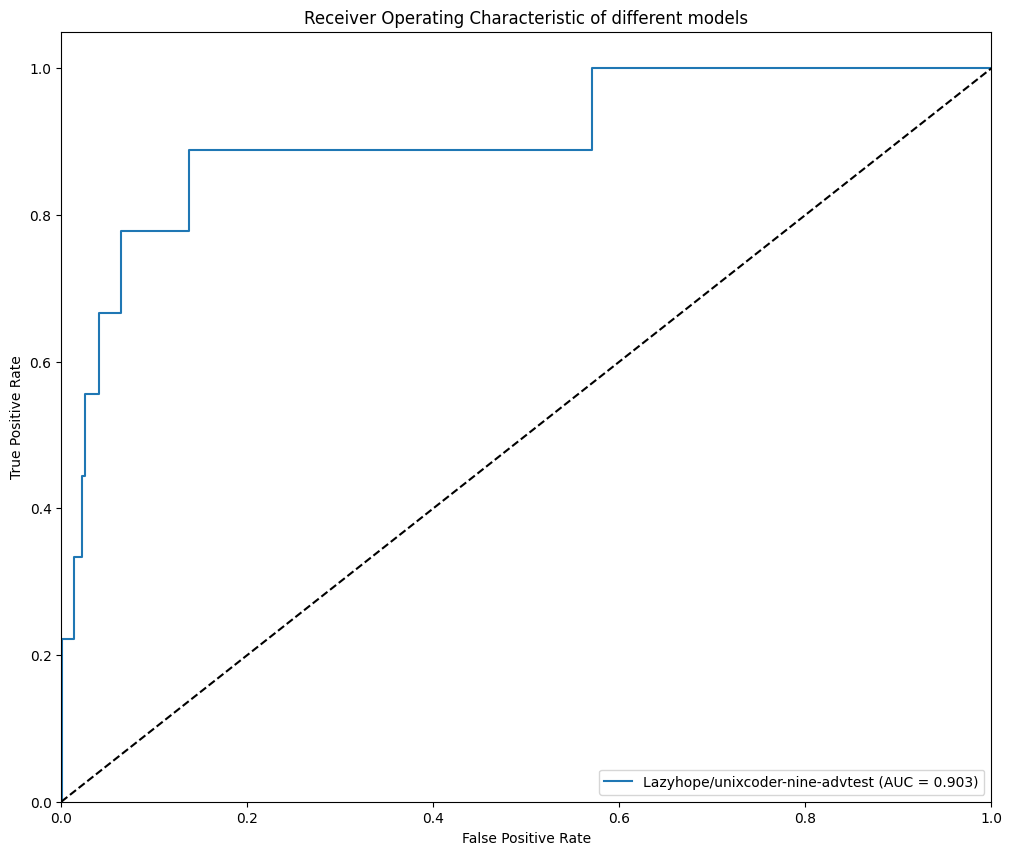

In [34]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

model_auc = {}
y_true = df['topic1'] == df['topic2']
fig = plt.figure(figsize=(12, 10))


def roc(model_name):
    y_score = df[model_name]
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    model_auc[model_name] = roc_auc
    plt.plot(fpr, tpr, label=model_name)


for model in model_names:
    roc(model)

# Order labels by each model's auc score
handles, labels = plt.gca().get_legend_handles_labels()
order = sorted(range(len(labels)), key=lambda k: -model_auc[labels[k]])
ordered_handles = [handles[idx] for idx in order]
ordered_labels = [f'{labels[idx]} (AUC = {model_auc[labels[idx]]:.3f})' for idx in order]
plt.legend(ordered_handles, ordered_labels, loc="lower right")

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic of different models')
plt.savefig('roc_code_evaluation_test_41.png')
plt.show()

In [35]:
model_auc

{'Lazyhope/unixcoder-nine-advtest': 0.9025893958076449}